In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import statsmodels.api as sm

county_data = pd.read_csv("project_477_777.csv", index_col='Row.Label')

# Stat 477/777 Final Presentation

Andres Mondragon

# Introduction
* This project intends to answer three questions of interest regarding a y-variable, in terms of the available predictor variables.
* The data concerns health, economic and demographic characteristics measured at the county level in the US.
* The unit of analysis is the county.
* The data was retrieved from: https://www.countyhealthrankings.org/

# The y-variable
* For this project, the y-variable is ```Poor.Health```.
* The data on the ```Poor.Health``` column represents the proportion of a county that has a poor health status.
* The distribution for ```Poor.Health``` can be display using a histogram:

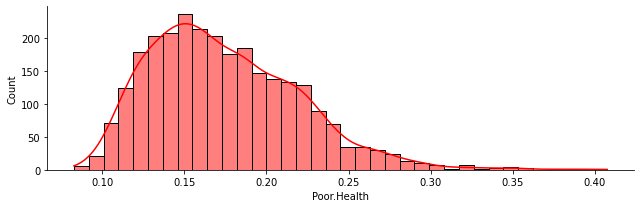

In [2]:
sns.displot(county_data['Poor.Health'], color="red", kde = True, height=3, aspect=3);

In [3]:
def summaries(name_of_variable, type_of_summary):
    return getattr(np, type_of_summary)(county_data[name_of_variable])

In [4]:
summaries('Poor.Health', 'median')

0.1673

* The median proportion of poor health status for all counties is 0.1673.
* At a county level, we can see that the median proportion of poor health status is around 16%, which is not a very large proportion of people.

# Graphical and Numerical Summaries of the y-variable
* We can explore the data at a State level too:

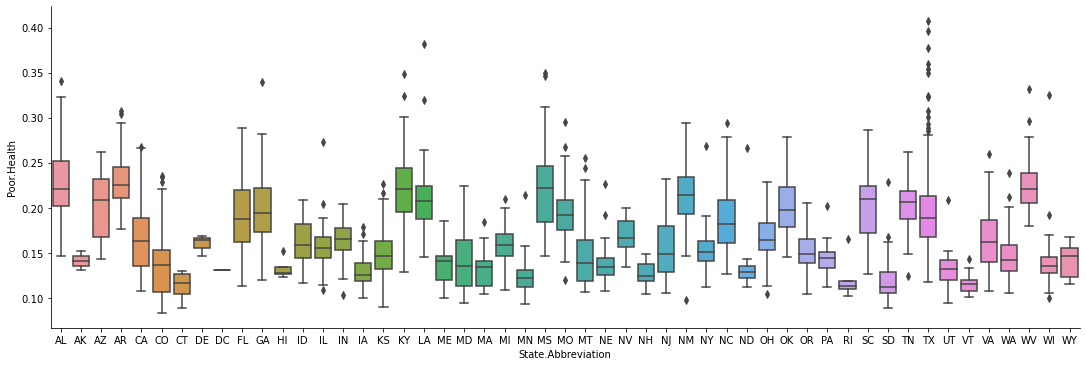

In [5]:
sns.catplot(x='State.Abbreviation', y = 'Poor.Health', kind="box", data = county_data, height=5, aspect=3);

* At a first glance, we can see that no median proportion of people with poor health status for any state get to the 0.30 level.
    * Despite there being some outliers, the median in the boxplots deals with them.
* Some states like Arizona or Mississippi have a larger spread of the data based on the size of the box.
* Other states like Alaska or Rhode Island have a smaller spread of the data.
    * This could be due to factors such as population size or even lack of data from those states.

In [6]:
poor_health_top5 = county_data.groupby('State.Abbreviation')[['Poor.Health']].mean().sort_values(by = ['Poor.Health'], ascending = False)[:5]
poor_health_top5.reset_index(inplace=True)
print(poor_health_top5)

  State.Abbreviation  Poor.Health
0                 AR     0.231626
1                 AL     0.229694
2                 WV     0.225047
3                 MS     0.223572
4                 KY     0.221119


* The state with highest proportion of people with a poor health status, on average, is Arkansas.

In [7]:
poor_health_bottom5 = county_data.groupby('State.Abbreviation')[['Poor.Health']].mean().sort_values(by = ['Poor.Health'])[:5]
poor_health_bottom5.reset_index(inplace=True)
print(poor_health_bottom5)

  State.Abbreviation  Poor.Health
0                 CT     0.113317
1                 VT     0.116242
2                 SD     0.119667
3                 RI     0.121780
4                 MN     0.123187


* The state with lowest proportion of people with a poor health status, on average, is Connecticut.

* We can also see the same difference in average proportion of people with a poor health status for all states graphically.

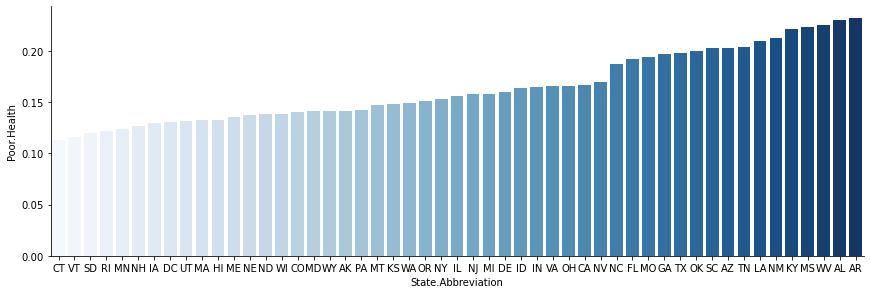

In [8]:
poor_health_all_states = county_data.groupby('State.Abbreviation')[['Poor.Health']].mean().sort_values(by = ['Poor.Health'], ascending = True)
poor_health_all_states.reset_index(inplace=True)
sns.catplot(x='State.Abbreviation', y="Poor.Health", kind="bar",data=poor_health_all_states, height=4, aspect=3, palette = sns.color_palette('Blues',51));


# Goals

* This project will attempt to answer:
    1. Do severe housing problems affect health?
    2. Does the number of mental health providers influence health?
    3. Do insufficient sleep and physical inactivity affect health?

# y-variable's relationship with predictor variables
## Poor.Health against Severe.Housing.Problems
* According to County Health Rankings and Roadmaps, ```Severe.Housing.Problems``` represents the percentage of households with at least 1 of 4 housing problems:
    1. overcrowding
    2. high housing costs
    3. lack of kitchen facilities
    4. lack of plumbing facilities. 
* Housing issues are problematic to health as it can potentially contribute to "infectious and chronic diseases, injuries, and poor childhood development."
* Also, if more money is spent on managing and fixing housing, there is less money available to afford basic needs or health insurance and medication.
<br />
<br />

*Source: https://rb.gy/lgsmst*

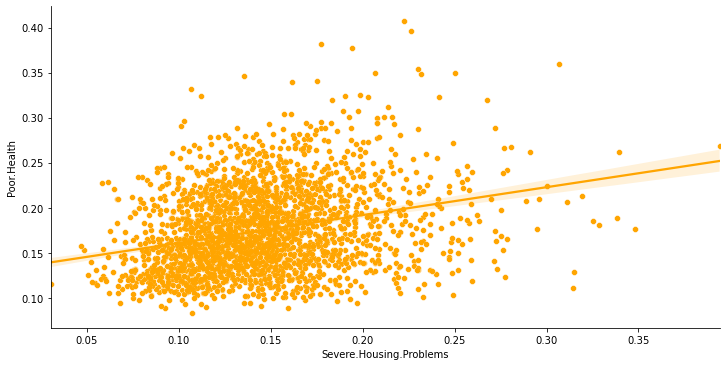

In [9]:
sns.relplot(x="Severe.Housing.Problems", y="Poor.Health", data = county_data, 
            color="orange", height=5, aspect=2);


sns.regplot(x="Severe.Housing.Problems", y="Poor.Health", data=county_data, marker='.', 
            color="orange");

In [10]:
summaries("Severe.Housing.Problems", 'median')*100

13.99

* The median percentage of households with at least 1 of 4 severe housing problems across all counties is 13.99.
* At a first glance, the scatterplot shows that the variables have a weak positive association, this is also corroborated by the slope of the regression line.
* This means that severe housing problems might potentially be responsible for poor health, but to a small degree.
* The median percentage of 13.99 is an indicator that across all counties, there is a relatively significant fraction of people still living in very severe housing conditions.

## Poor.Health against Mental.health.providers.Per.1000
* Over the past few decades, there has been an increase in the level of importance put towards mental health.
    * This comes from the growing understanding that mental health is just as important as physical health, since both are closely related.
* The data from County Health Rankings and Roadmaps on mental health, ```Mental.health.providers.Per.1000```, shows the number of mental health providers in county per 1000 people.
* Access to meantal health care requires both "financial coverage and access to providers."
<br />
<br />

*Source: https://rb.gy/vvya9g*

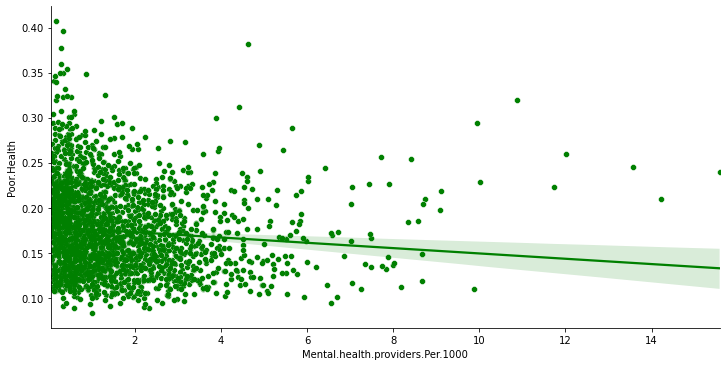

In [11]:
sns.relplot(x="Mental.health.providers.Per.1000", y="Poor.Health", data = county_data, 
            color="green", height=5, aspect=2);

sns.regplot(x="Mental.health.providers.Per.1000", y="Poor.Health", data=county_data, marker='.', 
            color="green");

In [12]:
summaries("Mental.health.providers.Per.1000", 'median')

1.036

* The median number of mental health providers per 1000 people in a county across all counties is 1.036.
* One would expect the relationship between both variables to be negative, the more mental health providers the less the proportion of the county that has a poor health status, yet, there seems to be no clear relationship between variables.
* The scatterplot does show that the majority of counties, where the data points are most concentrated, have less than 4 mental health providers per 1000 people.
* The median of 1.036 suggests that there is a lack of mental health professionals across all counties.

## Poor.Health against Insufficient.Sleep & Physical.Inactivity
* County Health Rankings and Roadmaps describes ```Insufficient.Sleep``` as the percentage of adults who report fewer than 7 hours of sleep on average.
* Likewise, ```Physical.Inactivity``` represents the percentage of adults age 20 and over reporting no leisure-time physical activity.
* Both lack of sleep and physical inactivity affect the way we perform on a day to day basis which can then escalate into a 'domino effect' situtation affecting overall health.
<br />
<br />

*Sources:*
1. https://rb.gy/melazn
2. https://rb.gy/dcbw0k

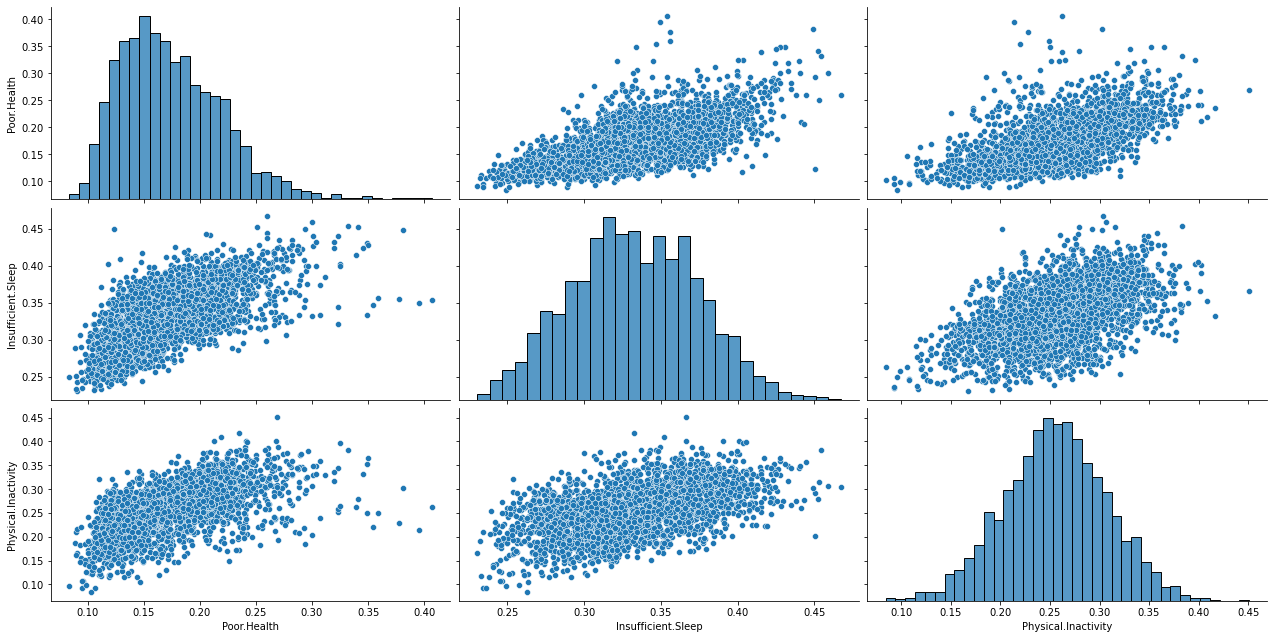

In [13]:
tmp_data = county_data[['Poor.Health','Insufficient.Sleep', 'Physical.Inactivity']]
sns.pairplot(tmp_data, height=3, aspect = 2);

In [14]:
print(summaries('Insufficient.Sleep', 'median')*100)
print(summaries('Physical.Inactivity', 'median')*100)

33.2
25.6


* The median percentage of adults who report fewer than 7 hours of sleep on average across all counties is 33.2.
* Likewise, the percentage of adults reporting no leisure-time physical activity across all counties is 25.6.
* This scatterplot matrix shows us the relationships between ```Poor.Health```, ```Insufficient.Sleep```, and ```Physical.Inactivity```.
* From the first row we can see that ```Poor.Health``` has a stronger positive correlation with ```Insufficient.Sleep``` than with previous predictor variables. We see a similar trend for ```Poor.Health``` against ```Physical.Inactivity```.
* We can infer that insufficient sleep and physical inactivity are potentially responsible for a county's poor health rate.
* This matrix also shows the relationship between two of the predictor variables, ```Insufficient.Sleep``` and ```Physical.Inactivity```, which is also positive.

# Relationships between predictor variables
* From the previous section we found the relationship between two of the predictor variables, ```Insufficient.Sleep``` and ```Physical.Inactivity```.
* We can do this with the rest of the predictor variables that will be used to answer our questions.

## Insufficient.Sleep against Severe.Housing.Problems 

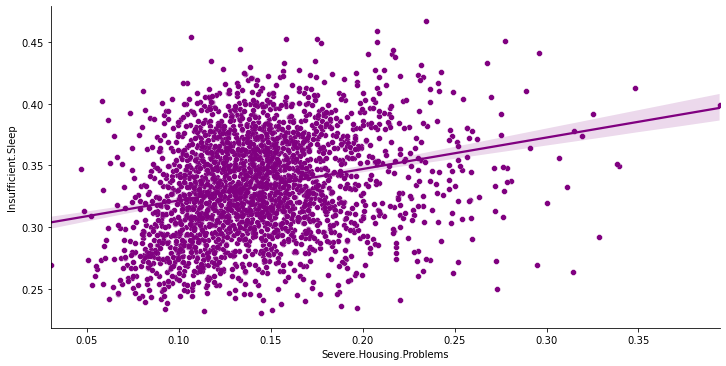

In [15]:
sns.relplot(x="Severe.Housing.Problems", y="Insufficient.Sleep", data = county_data, 
            color="purple", height=5, aspect=2);

sns.regplot(x="Severe.Housing.Problems", y="Insufficient.Sleep", data=county_data, marker='.', 
            color="purple");

* There seems to be a very weak positive relationship between the variables despite the idea that severe housing problems would generally cause the most amounts of problems to people in their daily lives, especially when it comes to sleep.
* The slope of the regression line is also not too steep, indicating it is not strongly correlated.

## Mental.health.providers.Per.1000 against Insufficient.Sleep

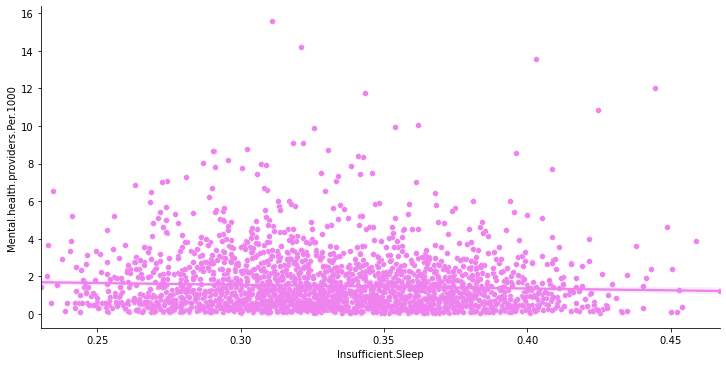

In [16]:
sns.relplot(x="Insufficient.Sleep", y="Mental.health.providers.Per.1000", data = county_data, 
            color="violet", height=5, aspect=2);

sns.regplot(x="Insufficient.Sleep", y="Mental.health.providers.Per.1000", data=county_data, marker='.', 
            color="violet");

* The scatterplot and the slope of the regression line indicate there is no relationship between these variables.
* If anything, one would deduce that insufficient sleep, which can potentially affect mental health, would call for more mental health providers. Yet, insufficient sleep seems to cause no impact in the number of mental health providers per 1000 people available.

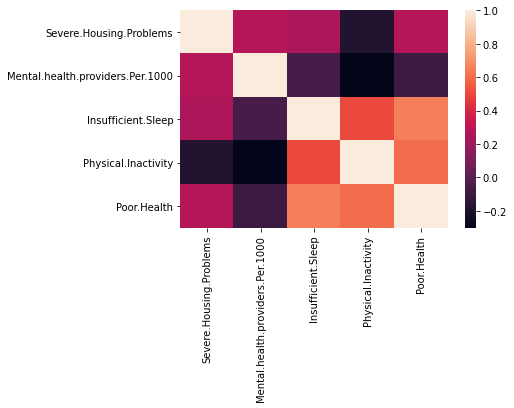

In [17]:
sns.heatmap(county_data[['Severe.Housing.Problems', 'Mental.health.providers.Per.1000',
                         'Insufficient.Sleep', 'Physical.Inactivity','Poor.Health']].corr());

* The heatmap shows the correlation between variables
* We can see that the variables that have highest correlation between them are ```Poor.Health``` (our y-variable) with  ```Insufficient.Sleep``` and ```Physical.Inactivity``` (predictor variables).
* We can then use a regression tree to check for how important are these two predictor variables when it comes to our y-variable.

# Regression Tree

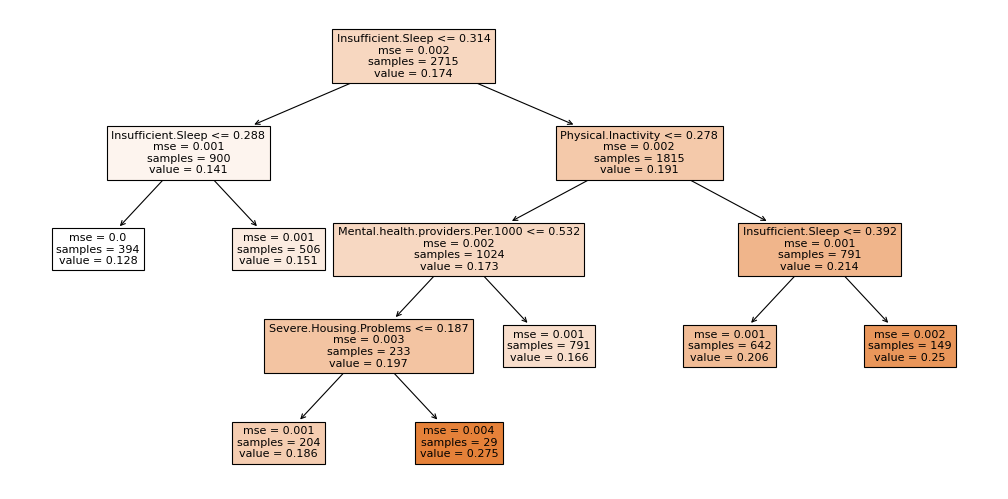

In [18]:
X = county_data[['Severe.Housing.Problems', 'Mental.health.providers.Per.1000',
               'Insufficient.Sleep', 'Physical.Inactivity']]
y = county_data['Poor.Health']
regtree = tree.DecisionTreeRegressor(max_leaf_nodes = 7)
regtree.fit(X, y)
fig = plt.figure(num=None, figsize=(16,8), dpi=80, facecolor='w',edgecolor='k')
tree.plot_tree(regtree, filled=True, feature_names=X.columns, fontsize = 10);

* Looking at the key splits we infer that ```Insufficient.Sleep``` is a dominant feature.
* We get the lowest value in the tree of 0.128 if we follow the condition that ```Insufficient.Sleep``` is less than 0.314 on the first split and then that ```Insufficient.Sleep``` is less than 0.288 on the second split.
    * This indicates that people who do get enough sleep are less likely to suffer from poor health, presummably because sleep is an important factor in how well we perform daily, which in turn determines how healthily we live.
    
* For the highest value in the tree of 0.275, this occurs if we follow the condition that Insufficient.Sleep is greater than 0.314, ```Physical.Inactivity``` is less than 0.278, ```Mental.health.providers.Per.1000``` is less than 0.532, and that ```Severe.Housing.Problems``` is greater than 0.187.
    * We can asssume that this is due to the fact that with no sufficient sleep and a low number of mental health providers as well as severe housing problems, a combination of both poor mental health and poor physical health results in overall poor health.
    * Despite physical inactivity being low in this sequence of conditions, this does not change the overall poor health condition.
    * However, there are only 29 observations which might indicate a bad set-up. Thus, we should also check the second highest score and see what that tells us.

* The second lowest score is 0.25 under the conditions that ```Insufficient.Sleep``` is greater than 0.314, ```Physical.Inactivity``` is greater than 0.278 and that the second ```Insufficient.Sleep``` split is greater than 0.392.
    * Here, the larger sample of 149 suggests a better set-up, suggesting that people who had less sleep and did less physical activity were more keen to also have poorer health. This is a reasonable assumption since insufficient sleep would impact physical performance, leading to a lack of physical activity which is beneficial for overall health.

## Variable importance metric

In [19]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(regtree.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False)
print(importances)

                            Feature  Importance
2                Insufficient.Sleep       0.623
3               Physical.Inactivity       0.253
0           Severe.Housing.Problems       0.067
1  Mental.health.providers.Per.1000       0.057


* Through this, we can prove that the variable with highest importance is in fact Insufficient.Sleep with an importance metric of 0.623.
* On the other hand, we can see that Severe.Housing.Problems and Mental.health.providers.Per.1000 are the two least important variables, despite both variables being indicators of very important issues that should be fixed.

# Conclusions

* For this project, I deliberately opted out of choosing very 'obvious' predictor variables like income.
* I especially wanted to find results on how mental health availability and sever housing problems could impact health since I come from a third-world country were these things usually lack across all districts.

### 1. Do severe housing problems affect health?
* In general, severe housing problems do not greatly affect health based on the variable importance metric (0.067) as well as the graphical representation of the tree which only shows the variable appearing once.

### 2. Does the number of mental health providers influence health?
* Just like severe housing problems, the number of mental health providers does not greatly affect health based on the variable importance metric (0.057) as well as the graphical representation of the tree which only shows the variable appearing once too.

### 3. Do insufficient sleep and physical inactivity affect health?
* These were the two most important predictor variables and dominant features.
* In particular, ```Insufficient.Sleep``` was the most important variable, with an importance metric of 0.623 and with several splits happening in the regression tree because of it.
* ```Physical.Inactivity``` was also a dominant feature but with less importance, 0.253.

## Suggestions for further research

1. Try using other predictor variables like ```Unemployment``` or ```Food.Insecurity.Quintile``` to make predictions about ```Poor.Health```.
2. Check results for different time periods and see if results change over time.
3. Use a classification tree instead of a regression tree.
4. Answer questions using a regression model as well as the tree model
5. Get even more data to work with.